In [1]:
import sys
sys.path.append('code/')

In [2]:
import theano
import theano.tensor as T

from lasagne.layers import InputLayer, DenseLayer, DropoutLayer, SliceLayer, ConcatLayer
from lasagne.layers.dnn import Conv2DDNNLayer as ConvLayer
from lasagne.layers.dnn import Pool2DDNNLayer as PoolLayer
import lasagne

import time, sys
import numpy as np
import cPickle as pickle

from nolearn.lasagne import NeuralNet, TrainSplit
from data_prep import data_prep
from utils import * 

from nolearn.lasagne.visualize import *
import matplotlib.pyplot as plt

# model definition
def build_model(num_epochs, batchsize, seed, verbose=1):
    net = NeuralNet(
        layers=[
            ('input', InputLayer),
            ('conv1', ConvLayer),
            ('pool1', PoolLayer),
            ('conv2', ConvLayer),
            ('pool2', PoolLayer),
            ('conv3', ConvLayer),
            ('conv4', ConvLayer),
            ('conv5', ConvLayer),
            ('pool5', PoolLayer),
            ('hidden6', DenseLayer),
            ('dropout6', DropoutLayer),
            ('hidden7', DenseLayer),
            ('dropout7', DropoutLayer),
            ('output', DenseLayer)
            ],
        # layer params
        input_shape = (None, 3, 227, 227),
        conv1_num_filters=96, conv1_filter_size=(11,11), conv1_stride=(4,4),
        pool1_pool_size=(3,3), pool1_stride=(2,2),
        conv2_num_filters=256, conv2_filter_size=(5,5), conv2_pad=(2,2),
        pool2_pool_size=(3,3), pool2_stride=(2,2),
        conv3_num_filters=384, conv3_filter_size=(3,3), conv3_pad=(1,1),
        conv4_num_filters=384, conv4_filter_size=(3,3), conv4_pad=(1,1),
        conv5_num_filters=256, conv5_filter_size=(3,3), conv5_pad=(1,1),
        pool5_pool_size=(3,3), pool5_stride=(2,2),
        hidden6_num_units=4096, dropout6_p=0.5,
        hidden7_num_units=4096, dropout7_p=0.5,
        output_num_units=22, output_nonlinearity=lasagne.nonlinearities.sigmoid,

        # optimisation
        objective_loss_function=lasagne.objectives.binary_crossentropy,
        # optimisation method
        update=lasagne.updates.nesterov_momentum,
        update_learning_rate=theano.shared(float32(3e-3)),
        update_momentum=theano.shared(float32(0.9)),
        # optimisation schedule
        on_epoch_finished=[
            AdjustVariable('update_learning_rate', start=3e-3, stop=1e-7),
            EarlyStopping(patience=200)
            ],

        # Miscs
        train_split=TrainSplit(eval_size=0.3, seed=seed),
        regression = True, # to not invoke (single label) classification
        batch_iterator_train=FlipBatchIterator(batch_size=batchsize), 
        max_epochs=num_epochs,
        verbose=verbose
    )
    return net

Using gpu device 0: GeForce GTX 660 (CNMeM is disabled)


In [7]:
num_epochs=1000; mode="run"; batchsize=96; des="toy"; seed=11
fname_pretrain = "pretrained/net_cropflip2_515.pkl"
if mode=="toy": 
    num_epochs=3    

net = build_model(num_epochs, batchsize, seed) 

# load pretrained model
if fname_pretrain:
    print("\nLoading pretrained model")
    with open(fname_pretrain, 'rb') as f:
        net_pretrain = pickle.load(f)
else:
    net_pretrain = None

if net_pretrain is not None:
    net.load_params_from(net_pretrain)

X, Y = data_prep(mode=mode)
'''HAVENT SUBTRACT IMAGE MEAN'''


Loading pretrained model
Loaded parameters to layer 'conv1' (shape 96x3x11x11).
Loaded parameters to layer 'conv1' (shape 96).
Loaded parameters to layer 'conv2' (shape 256x96x5x5).
Loaded parameters to layer 'conv2' (shape 256).
Loaded parameters to layer 'conv3' (shape 384x256x3x3).
Loaded parameters to layer 'conv3' (shape 384).
Loaded parameters to layer 'conv4' (shape 384x384x3x3).
Loaded parameters to layer 'conv4' (shape 384).
Loaded parameters to layer 'conv5' (shape 256x384x3x3).
Loaded parameters to layer 'conv5' (shape 256).
Loaded parameters to layer 'hidden6' (shape 9216x4096).
Loaded parameters to layer 'hidden6' (shape 4096).
Loaded parameters to layer 'hidden7' (shape 4096x4096).
Loaded parameters to layer 'hidden7' (shape 4096).
Loaded parameters to layer 'output' (shape 4096x22).
Loaded parameters to layer 'output' (shape 22).

Loading data...

Augmenting data...
(2940, 3, 227, 227) uint8 (2940, 22) float32


'HAVENT SUBTRACT IMAGE MEAN'

In [10]:
net.fit(X, Y)

# Neural Network with 58371478 learnable parameters

## Layer information

  #  name      size
---  --------  ---------
  0  input     3x227x227
  1  conv1     96x55x55
  2  pool1     96x27x27
  3  conv2     256x27x27
  4  pool2     256x13x13
  5  conv3     384x13x13
  6  conv4     384x13x13
  7  conv5     256x13x13
  8  pool5     256x6x6
  9  hidden6   4096
 10  dropout6  4096
 11  hidden7   4096
 12  dropout7  4096
 13  output    22

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  ------
      1       0.61610       8.44437      0.07296  36.97s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f7bf4b22250>,
     batch_iterator_train=<utils.FlipBatchIterator object at 0x7f7bd2663f50>,
     conv1_filter_size=(11, 11), conv1_num_filters=96, conv1_stride=(4, 4),
     conv2_filter_size=(5, 5), conv2_num_filters=256, conv2_pad=(2, 2),
     conv3_filter_size=(3, 3), conv3_num_filters=384, conv3_pad=(1, 1),
     conv4_filter_size=(3, 3), conv4_num_filters=384, conv4_pad=(1, 1),
     conv5_filter_size=(3, 3), conv5_num_filters=256, conv5_pad=(1, 1),
     custom_score=None, dropout6_p=0.5, dropout7_p=0.5,
     hidden6_num_units=4096, hidden7_num_units=4096,
     input_shape=(None, 3, 227, 227),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv1', <class 'lasagne.layers.dnn.Conv2DDNNLayer'>), ('pool1', <class 'lasagne.layers.dnn.Pool2DDNNLayer'>), ('conv2', <class 'lasagne.layers.dnn.Conv2DDNNLayer'>), ('pool2', <class 'lasagne.layers.dnn.Pool2DDNNLayer'>), ('


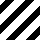
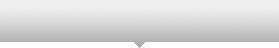
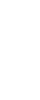
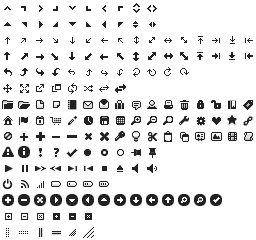
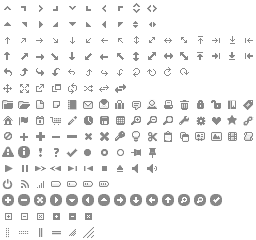
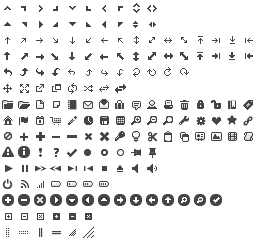
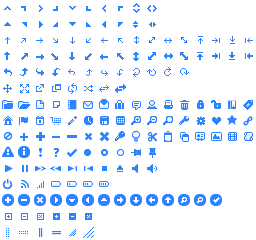
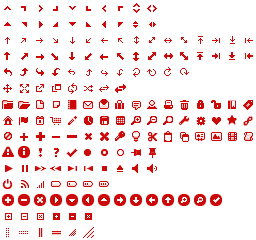
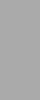
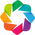
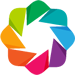
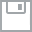
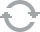
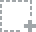
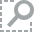
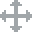
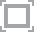
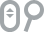

In [14]:
from bokeh.plotting import figure, output_file, show, VBox

# EXERCISE: output static HTML file
# output_file('/home/hoa/Desktop/multiLabel/MSRCv2.html')

from bokeh.io import output_notebook # need newer version of bokeho
output_notebook()

with open("Data/MSRCv2/lables.pkl") as f:
    data=pickle.load(f)
labelIDs = data[1]
Ytr = Y[net.indices[0],:];Yva = Y[net.indices[1],:]
allClassDistr = np.vstack((sum(Ytr), sum(Yva)))
allClassDistr = np.float32(allClassDistr)/np.reshape(allClassDistr.sum(axis=1), (2,1))

p2 = figure(title="train/valid label distribution", tools="",
            x_range=sorted(labelIDs.keys()), y_range=[0, 1.1*np.max(allClassDistr[:])],
            background_fill='#59636C', plot_width=800, plot_height=300)

# Categorical percentage coordinates can be used for positioning/grouping
label_tr = [c+":0.1" for c in sorted(labelIDs.keys())]
label_va = [c+":0.5" for c in sorted(labelIDs.keys())]

# EXERCISE: re create the medal plot, but this time:
#   - do not stack the bars on the y coordinate
#   - use countries_gold, etc. to positions the bars on the x coordinate
p2.rect(x=label_tr, y=allClassDistr[0,:]/2., width=0.4, height=allClassDistr[0,:], color="gold", alpha=0.7)
p2.rect(x=label_va, y=allClassDistr[1,:]/2., width=0.4, height=allClassDistr[1,:], color="silver", alpha=0.7)

p2.xgrid.grid_line_color = None
p2.axis.major_label_text_font_size = "8pt"
p2.axis.major_label_standoff = 0
p2.xaxis.major_label_orientation = np.pi/3
p2.xaxis.major_label_standoff = 6
p2.xaxis.major_tick_out = 0

# show the plots arrayed in a VBox
show(VBox(p2))

In [27]:
# Save the model
des=="toy"
if des==None: 
    des=time.strftime("%y%m%d%H%M%S", time.localtime())
sys.setrecursionlimit(10000)
with open('training/net_'+des+'.pkl', 'wb') as f:
    pickle.dump(net, f, -1)
# Visualisation
plot_loss(net, filename='training/loss_'+des+'.png')    

# Threshold learning

In [6]:
import sys
sys.path.append('code/')
from data_prep import data_prep
X, Y = data_prep()


Loading data...

Augmenting data...
(2940, 3, 227, 227) uint8 (2940, 22) float32


In [7]:
import numpy as np
# Load validaton indicies
idx=np.load("pretrained/indicies.npy")
training_idx = idx[0]
valid_idx = idx[1]

In [8]:
training_out = np.load("pretrained/training_out.npy")
valid_out = np.load("pretrained/valid_out.npy")

In [9]:
Y_training = Y[training_idx]
Y_valid = Y[valid_idx]

In [21]:
test_idx = np.arange(20)
Xout_test = training_out[test_idx]
Y_test = Y_training[test_idx]

In [11]:
from scipy.optimize import minimize_scalar
from sklearn.metrics import f1_score

class Threshold(object):
    def __init__(self, Xout, Y):
        self.Xout = Xout
        self.Y = Y
        self.t = []
        self.f1 = []

    def find_t_for(self):
        def minus_f1(t): 
            # we want to minimise f1 i.e. maximise -f1
            y_pred = self.Xout[i]>t
            out = f1_score(self.Y[i], y_pred)
            
            return -out
        
        for i in xrange(len(self.Y)):
            tmp = minimize_scalar(minus_f1, bounds=(0, 1), method='bounded')
            self.t.append(tmp.x)
            self.f1.append(-tmp.fun)

In [12]:
thresholds = Threshold(training_out,Y_training)
thresholds.find_t_for()  

/home/hoa/.conda/envs/multiLabEnv/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
np.unique(np.asarray(thresholds.f1))

array([ 0. ,  0.8,  1. ])

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(training_out, np.asarray(thresholds.t))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
t_valid = regr.predict(valid_out)

In [43]:
class LabelPredictor(object):
    def __init__(self, Xout, t):
        self.Xout = Xout
        self.t = t
        self.f1 = []
        self.y_preds=[]

    def out(self):
        for i in xrange(len(self.t)):
            y_pred = self.Xout[i] > self.t[i]
            tmp = f1_score(Y_valid[i], y_pred)
            
            self.f1.append(tmp)
            self.y_preds.append(y_pred)
            
prediction = LabelPredictor(valid_out, t_valid)
prediction.out()

In [74]:
n_samples = len(Y)//5; n_samples

588

In [82]:
show_idx = np.where(valid_idx<588); 

(array([  3,   6,   8,   9,  15,  16,  17,  20,  22,  26,  27,  28,  29,
         40,  48,  67,  69,  72,  73,  77,  88,  94,  99, 102, 105, 107,
        125, 139, 140, 162, 165, 167, 168, 174, 177, 182, 193, 194, 202,
        208, 211, 216, 223, 230, 233, 234, 238, 245, 246, 261, 272, 274,
        276, 282, 287, 297, 304, 307, 312, 313, 317, 318, 320, 321, 337,
        343, 350, 352, 355, 357, 359, 365, 367, 386, 387, 389, 402, 412,
        420, 423, 426, 427, 433, 441, 442, 444, 445, 449, 451, 457, 458,
        461, 462, 463, 467, 473, 474, 480, 481, 490, 491, 508, 509, 522,
        526, 537, 539, 540, 541, 543, 545, 546, 554, 556, 559, 571, 577,
        585, 586, 588, 592, 600, 603, 606, 609, 614, 622, 628, 637, 638,
        643, 644, 645, 647, 653, 657, 658, 666, 674, 677, 682, 685, 691,
        699, 700, 702, 720, 725, 727, 733, 734, 744, 749, 750, 759, 760,
        773, 780, 795, 816, 817, 818, 820, 834, 838, 846, 849, 856, 869,
        873, 881]),)

In [86]:
test = np.arange(18).reshape((2,3,3)); test

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [99]:
out=np.swapaxes(np.swapaxes(test,0,1),1,2) #c01 to 01c
for i in xrange(out.shape[2]):
    print out[:,:,i]

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 9 10 11]
 [12 13 14]
 [15 16 17]]


In [61]:
show_idx = np.random.choice(len(valid_idx), 10, replace=False)

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

show_imgs = X[valid_idx[show_idx]] 
show_imgs = np.swapaxes(np.swapaxes(show_imgs,1,2),2,3) # bc01 to b01c
show_imgs.shape

(10, 227, 227, 3)

In [63]:
labelNames = np.load("Data/MSRCv2/lables.pkl")[0]

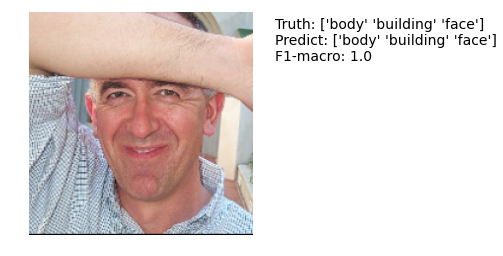

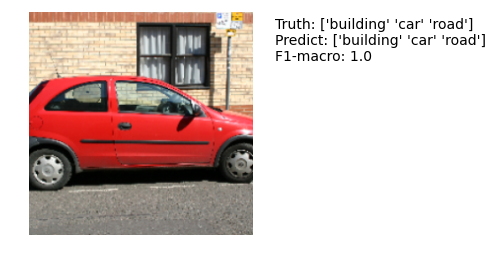

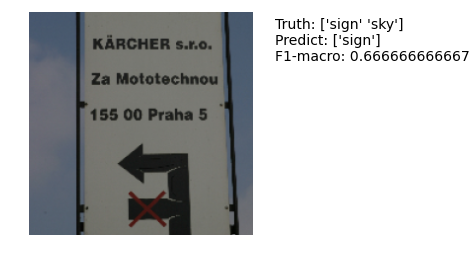

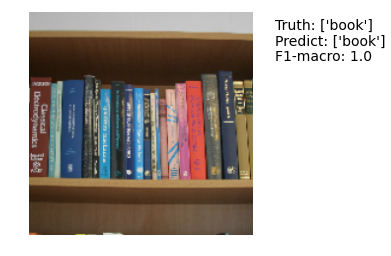

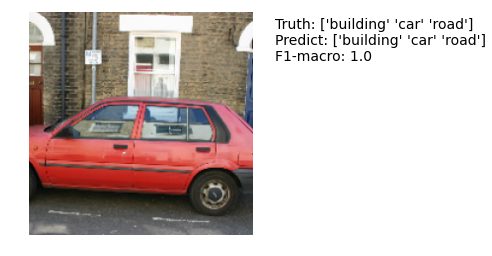

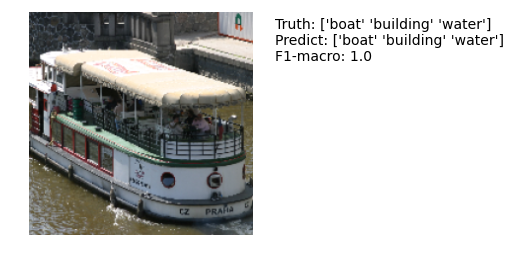

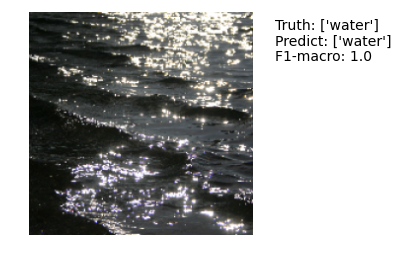

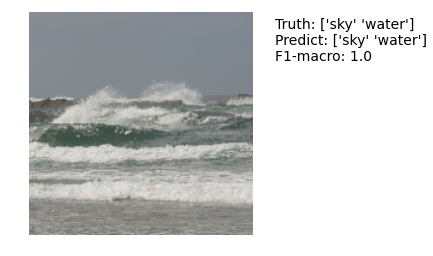

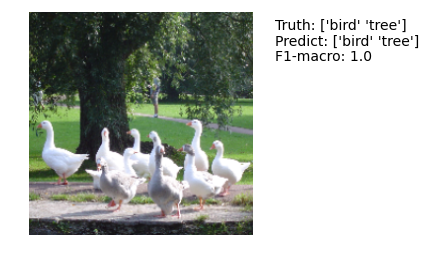

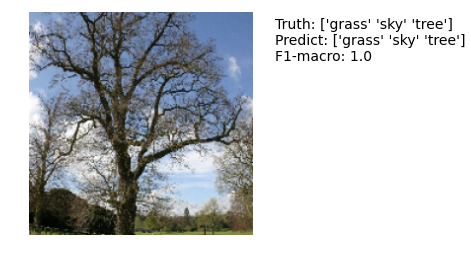

In [67]:
for i in xrange(len(show_imgs)):
    img = show_imgs[i]
    
    plt.figure()
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    
    plt.text(250, 50, 
             'Truth: {}\nPredict: {}\nF1-macro: {}'.format(
            labelNames[np.where(Y_valid[show_idx][i]==1)],
            labelNames[np.where(np.asarray(prediction.y_preds)[show_idx][i]==1)],
            np.asarray(prediction.f1)[show_idx][i]
            ), fontsize=14)